# <center>**SPLIT TRAIN & TEST DATA, FIT MODEL, PREDICT DATA**</center>

In [74]:

import numpy as np  # Untuk operasi vektor dan matriks
import pandas as pd  # Untuk operasi data frame
import matplotlib.dates as mdates  # Untuk mengubah format tanggal
from statsmodels.tsa.arima.model import ARIMA  # Untuk membuat model ARIMA
from statsmodels.tools.eval_measures import rmse  # Untuk menghitung nilai RMSE
from pmdarima import auto_arima  # Untuk menentukan parameter model ARIMA
import matplotlib.pyplot as plt  # Untuk membuat plot
import tkinter as tk
from tkinter import ttk
from tkcalendar import DateEntry
from ttkthemes import ThemedTk
from tkinter import messagebox
from datetime import datetime, date
import customtkinter as ctk
import locale
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import filedialog


# <center>**GATHERING DATA**</center>

In [75]:
df = pd.read_excel(
    "Tabel Harga Berdasarkan Daerah (7).xlsx", header=None
)  # Membaca file excel


# Transpose data frame untuk mempermudah proses analisis
df = df.T

df

,0,1,2,3,4,5,6,7
0,No,I,1,2,3,4,5,6
1,Komoditas (Rp),Beras,Beras Kualitas Bawah I,Beras Kualitas Bawah II,Beras Kualitas Medium I,Beras Kualitas Medium II,Beras Kualitas Super I,Beras Kualitas Super II
2,02/ 04/ 2018,"11,050",-,-,"9,300","8,900","15,000","11,000"
3,09/ 04/ 2018,"11,050",-,-,"9,300","8,900","15,000","11,000"
4,16/ 04/ 2018,"11,050",-,-,"9,300","8,900","15,000","11,000"
...,...,...,...,...,...,...,...,...
294,06/ 11/ 2023,"12,450","11,850","11,200","12,550","12,650","13,500","13,000"
295,13/ 11/ 2023,"12,450","11,850","11,200","12,550","12,650","13,500","13,000"
296,20/ 11/ 2023,"12,450","11,700","11,200","12,550","12,650","13,500","13,000"
297,27/ 11/ 2023,"12,500","11,750","11,350","12,600","12,600","13,350","12,950"


# <center>**DATA PREPARATION & CLEANING**</center>


In [76]:
# Mengubah nama kolom
df1 = df.rename(
   {
      0: "Tanggal",
      1: "Beras",
      2: "Beras Kualitas Bawah I",
      3: "Beras Kualitas Bawah II",
      4: "Beras Kualitas Medium I",
      5: "Beras Kualitas Medium II",
      6: "Beras Kualitas Super I",
      7: "Beras Kualitas Super II",
   },
   axis=1,
)

# Menghapus baris pertama dan kedua untuk mempermudah proses analisis
df1 = df1.drop(df1.index[[0, 1]])

y = df1.copy()  # Copy data frame ke variabel baru "y"

y.replace("-", np.nan, inplace=True)  # Mengganti data '-' dengan NaN
y = y.dropna()  # Menghapus data NaN


y = y.applymap(
   lambda x: pd.to_numeric(str(x).replace(",", ""), errors="ignore")
)  # Mengubah tipe data HARGA BERAS menjadi numerik

y["Tanggal"] = pd.to_datetime(
   y["Tanggal"], format='mixed'
)  # Mengubah tipe data 'Tanggal' menjadi datetime
y.set_index("Tanggal", inplace=True)  # Mengubah kolom 'Tanggal' menjadi index
y = y[y.index >= "2018-11-01"]  # Mengambil data dari tanggal 1 November 2018
y

,Beras,Beras Kualitas Bawah I,Beras Kualitas Bawah II,Beras Kualitas Medium I,Beras Kualitas Medium II,Beras Kualitas Super I,Beras Kualitas Super II
Tanggal,,,,,,,
2018-12-11,9500,8950,8600,9350,9200,10200,9550
2018-11-19,9500,8950,8600,9300,9200,10200,9550
2018-11-26,9750,9100,9100,9600,9600,10300,9650
2018-12-17,9750,9100,9100,9600,9600,10300,9650
2018-12-24,9750,9150,9100,9700,9600,10350,9700
...,...,...,...,...,...,...,...
2023-06-11,12450,11850,11200,12550,12650,13500,13000
2023-11-13,12450,11850,11200,12550,12650,13500,13000
2023-11-20,12450,11700,11200,12550,12650,13500,13000


# <center>**DATA NORMALIZATION & TRANSFORMATION**</center>


In [77]:
beras = y["Beras"].resample("MS").mean()
beras_B1 = y["Beras Kualitas Bawah I"].resample("MS").mean()
beras_B2 = y["Beras Kualitas Bawah II"].resample("MS").mean()
beras_M1 = y["Beras Kualitas Medium I"].resample("MS").mean()
beras_M2 = y["Beras Kualitas Medium II"].resample("MS").mean()
beras_S1 = y["Beras Kualitas Super I"].resample("MS").mean()
beras_S2 = y["Beras Kualitas Super II"].resample("MS").mean()
y = y.fillna(y.bfill())  # Mengisi data kosong dengan data sebelumnya
y

,Beras,Beras Kualitas Bawah I,Beras Kualitas Bawah II,Beras Kualitas Medium I,Beras Kualitas Medium II,Beras Kualitas Super I,Beras Kualitas Super II
Tanggal,,,,,,,
2018-12-11,9500,8950,8600,9350,9200,10200,9550
2018-11-19,9500,8950,8600,9300,9200,10200,9550
2018-11-26,9750,9100,9100,9600,9600,10300,9650
2018-12-17,9750,9100,9100,9600,9600,10300,9650
2018-12-24,9750,9150,9100,9700,9600,10350,9700
...,...,...,...,...,...,...,...
2023-06-11,12450,11850,11200,12550,12650,13500,13000
2023-11-13,12450,11850,11200,12550,12650,13500,13000
2023-11-20,12450,11700,11200,12550,12650,13500,13000


# <center>**DATA PLOTTING**</center>


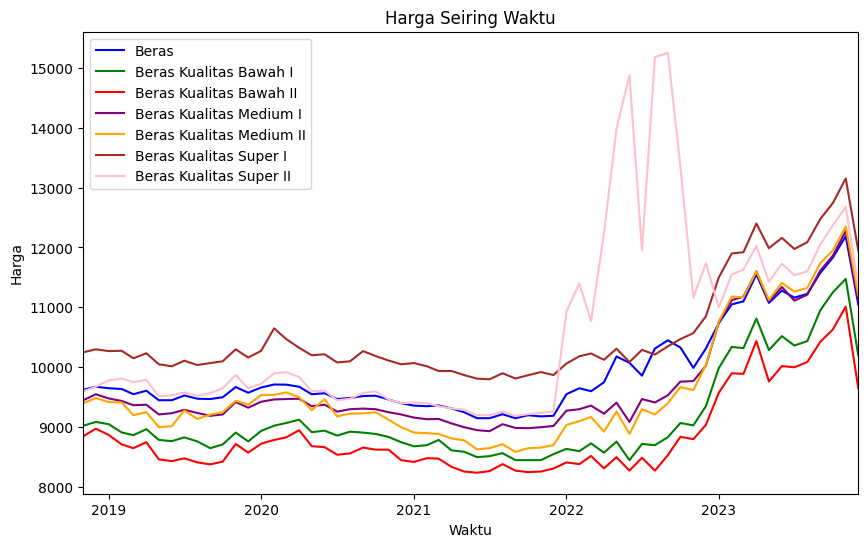

In [78]:
plt.figure(figsize=(10, 6))  # Ukuran plot

plt.plot(beras.index, beras, label="Beras", color="blue")
plt.plot(beras_B1.index, beras_B1, label="Beras Kualitas Bawah I", color="green")
plt.plot(beras_B2.index, beras_B2, label="Beras Kualitas Bawah II", color="red")
plt.plot(beras_M1.index, beras_M1, label="Beras Kualitas Medium I", color="purple")
plt.plot(beras_M2.index, beras_M2, label="Beras Kualitas Medium II", color="orange")
plt.plot(beras_S1.index, beras_S1, label="Beras Kualitas Super I", color="brown")
plt.plot(beras_S2.index, beras_S2, label="Beras Kualitas Super II", color="pink")

plt.xlabel("Waktu")  # Label sumbu x
plt.ylabel("Harga")  # Label sumbu y
plt.title("Harga Seiring Waktu")  # Judul plot
plt.legend()  # Menampilkan legenda

plt.xlim(
   [mdates.date2num(pd.to_datetime("2018-11-01")), max(mdates.date2num(beras.index))]
)  # Batas sumbu x

plt.show()  # Menampilkan plot

# <center>**FIND BEST ARIMA MODEL**</center>


In [79]:
def Model(type):
   auto_arima_model = auto_arima(type, m=7, trace=True)

   # Mendapatkan nilai order dan seasonal_order dari auto_arima
   order = auto_arima_model.order
   seasonal_order = auto_arima_model.seasonal_order

   # Membuat model ARIMA manual dengan nilai yang diperoleh dari auto_arima
   return ARIMA(type, order=order, seasonal_order=seasonal_order)

# <center>**GUI - TKINTER**</center>

In [81]:
beras = beras
beras_B1 = beras_B1
beras_B2 = beras_B2
beras_M1 = beras_M1
beras_M2 = beras_M2
beras_S1 = beras_S1
beras_S2 = beras_S2
class App:
   locale.setlocale(locale.LC_ALL, 'id_ID.UTF-8')
   def __init__(self, master):
      self.master = master
      master.title("Rice Futures")
      
      # mengatur bg master
      master.configure(bg='#232323')

      # Mengatur ukuran dan posisi window agar fullscreen dan di tengah
      master.geometry("1080x720")

      # Membuat frame untuk menampung konten
      self.content_frame = tk.Canvas(master)
      self.content_frame.pack(expand=True)
      
      
      ######################################
      line_length = 283

      # create frame untuk header / judul
      frame_judul = ttk.Frame(self.content_frame)
      frame_judul.pack(pady=20, padx=50)

      # Create the title label
      label_judul = ttk.Label(frame_judul, text="Rice Futures", font=("Lato", 32, "bold"), anchor='center', foreground='black')
      label_judul.grid(row=0, column=0, pady=(0, 0))  # Posisi label dengan sedikit padding di bagian bawah

      # Create line for the title
      canvas_lineJudul = tk.Canvas(frame_judul, width=line_length, height=4, highlightthickness=0)
      canvas_lineJudul.grid(row=1, column=0, pady=(0, 0))  # Posisi line dengan sedikit padding di bagian atas

      # Calculate y-coordinate for the middle of the canvas
      y = canvas_lineJudul.winfo_reqheight() // 2
      x1, y1 = 0, y
      x2, y2 = line_length, y
      canvas_lineJudul.create_line(x1, y1, x2, y2, width=1, fill="#A6A6A6")
      
      
      ######################################
      
      
      #create frame untuk start & end date
      frame_intervalDate = ttk.Frame(self.content_frame)
      frame_intervalDate.pack(pady=(5,15))
      
      #start date 
      frame_startDate = ttk.Frame(frame_intervalDate)
      frame_startDate.grid(row=0, column=0)
      
      label_startDate = ttk.Label(frame_startDate, text='Start Date', font=("Lato", 12), foreground='black', anchor='w')
      label_startDate.grid(row=0, column=0, sticky='w', padx=10)
      
      self.startDate = None
      self.date_start = DateEntry(frame_startDate, font=("Lato", 12), borderwidth=2, relief="flat", selectbackground="#a6a6a6")
      self.date_start.grid(row=1, column=0, padx=10)
      self.date_start.bind("<<DateEntrySelected>>", self.handle_Startdate_selected)
      
      #end date
      frame_endDate = ttk.Frame(frame_intervalDate)
      frame_endDate.grid(row=0, column=1)
      
      label_endDate = ttk.Label(frame_endDate, text='End Date', font=("Lato", 12), foreground='black',  anchor='e')
      label_endDate.grid(row=0, column=0, sticky='e', padx=10)
      
      self.endDate = None
      self.date_end = DateEntry(frame_endDate, font=("Lato", 12), borderwidth=2, relief="flat", selectbackground="#a6a6a6")
      self.date_end.grid(row=1, column=0, padx=10)
      self.date_end.bind("<<DateEntrySelected>>", self.handle_Enddate_selected)
      

      ######################################################
      
      
      #create frame untuk jenis beras
      frame_riceType = ttk.Frame(self.content_frame)
      frame_riceType.pack(pady=(0,15))
      
      #label tipe beras
      label_riceType = ttk.Label(frame_riceType, text='Choice of Rice Type', font=("Lato", 12), foreground='black')
      label_riceType.grid(row=0, column=0, pady=(0,3))
      
      #CREATE combobox / list
      self.beras_dataframes = {
         'beras' : beras,
         'beras_B1' : beras_B1,
         'beras_B2' : beras_B2,
         'beras_M1' : beras_M1,
         'beras_M2' : beras_M2,
         'beras_S1' : beras_S1,
         'beras_S2' : beras_S2
      }
      beras_types = list(self.beras_dataframes.keys())
      self.combobox_RiceType = ttk.Combobox(frame_riceType, values=beras_types, state="readonly", font=("Lato", 12))
      self.combobox_RiceType.grid(row=1, column=0)
      
      # Menambahkan fungsi yang akan dipanggil saat item dipilih
      self.combobox_RiceType.bind("<<ComboboxSelected>>", self.on_combobox_change)
      
      # Set default selection
      self.combobox_RiceType.set(beras_types[0])
      ##################################################################
      
   
      #create button predict
      predict_button = ttk.Button(self.content_frame, text='Predict', command=lambda: self.on_combobox_change(None))
      predict_button.pack(pady=(0,7))
      
      
      ###########################################################
      
      
      # create button DOWNLOAD DATA PREDICT
      download_button = ttk.Button(self.content_frame, text='Download Data', command=self.download_data)
      download_button.pack()
      
      
      #####################################################################
      
      # Menambahkan tombol keluar
      exit_button = ttk.Button(self.content_frame, text="Exit", command=self.master.destroy)
      exit_button.pack(pady=(7,20))
      
      
      #############################################################
      
   def download_data(self):
      selected_beras = self.combobox_RiceType.get()
      start_date_pred = self.date_start.get_date()
      end_date_pred = self.date_end.get_date()

      beras_df = self.beras_dataframes[selected_beras]

      auto_arima_model = auto_arima(beras_df, m=7, trace=True)
      order = auto_arima_model.order
      seasonal_order = auto_arima_model.seasonal_order
      model = SARIMAX(beras_df, order=order, seasonal_order=seasonal_order)
      n = int(len(beras_df) * 0.8)
      train_df = beras_df.iloc[:n]
      test_df = beras_df.iloc[n:]
      result = model.fit()
      start = len(train_df)
      end = len(train_df) + len(test_df) - 1

      prediction = result.predict(start=start, end=end, dynamic=False).rename("SARIMA Predictions")

      pred_uc = result.get_forecast(steps=(pd.to_datetime(end_date_pred) - pd.to_datetime(start_date_pred)).days)
      pred_ci = pred_uc.conf_int()
      forecasted_data = pred_uc.predicted_mean.to_frame()
      forecasted_data_daily = forecasted_data.resample("D").asfreq()
      forecasted_data_daily.interpolate(method="time", inplace=True)

      # Save data to CSV file
      file_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("CSV files", "*.csv")],
                                                   initialfile="predicted_RICE_price.csv")

      if file_path:
         harga_prediksi = forecasted_data_daily.loc[start_date_pred:end_date_pred, "predicted_mean"]
         harga_prediksi.to_csv(file_path, header=["Predicted Price"])

         messagebox.showinfo("Download Successful", "Data has been successfully downloaded!")


   
   def plot_and_display_predictions(self, selected_beras, start_date_pred, end_date_pred):
      beras_df = self.beras_dataframes[selected_beras]

      auto_arima_model = auto_arima(beras_df, m=7, trace=True)

      # Get order and seasonal_order from auto_arima
      order = auto_arima_model.order
      seasonal_order = auto_arima_model.seasonal_order

      # Create SARIMA model with values obtained from auto_arima
      model = SARIMAX(beras_df, order=order, seasonal_order=seasonal_order)

      n = int(len(beras_df) * 0.8)
      train_df = beras_df.iloc[:n]
      test_df = beras_df.iloc[n:]

      result = model.fit()

      start = len(train_df)
      end = len(train_df) + len(test_df) - 1

      # Predict and plot
      prediction = result.predict(start=start, end=end, dynamic=False).rename("SARIMA Predictions")

      plt.plot(train_df.index, train_df, label='Training Data', color='blue')
      plt.plot(test_df.index, test_df, label='Testing Data', color='red')
      plt.plot(test_df.index, prediction, label='SARIMA Predictions', color='green')

      plt.legend()
      plt.show()

      # Predict in the specified interval
      pred_uc = result.get_forecast(steps=(pd.to_datetime(end_date_pred) - pd.to_datetime(start_date_pred)).days)
      pred_ci = pred_uc.conf_int()

      forecasted_data = pred_uc.predicted_mean.to_frame()
      forecasted_data_daily = forecasted_data.resample("D").asfreq()
      forecasted_data_daily.interpolate(method="time", inplace=True)

      # Display predictions for the specified interval in a table
      harga_prediksi = forecasted_data_daily.loc[start_date_pred:end_date_pred, "predicted_mean"]
      harga_prediksi_formatted = harga_prediksi.apply(lambda x: locale.currency(x, grouping=True))

      # Create a new window for the table display
      table_root = tk.Toplevel(self.master)
      table_root.title("Predicted Prices")

      # Create a modern-looking table using Treeview
      columns = ["Date", "Predicted Price"]
      tree = ttk.Treeview(table_root, columns=columns, show="headings")

      for col in columns:
         tree.heading(col, text=col, anchor="center")
         tree.column(col, width=150, anchor="center")

      for date, price in zip(harga_prediksi.index, harga_prediksi_formatted):
         tree.insert("", "end", values=(date.strftime('%Y-%m-%d'), price), tags="center")

      tree.pack()

   
   def on_combobox_change(self, event):
      selected_beras = self.combobox_RiceType.get()
      start_date_pred = self.date_start.get_date()
      end_date_pred = self.date_end.get_date()
      self.plot_and_display_predictions(selected_beras, start_date_pred, end_date_pred)
   
      
   def handle_Startdate_selected(self, event):
      selected_startDate_obj = self.date_start.get_date()

      valid_start_date = datetime(2024, 1, 1).date()

      if selected_startDate_obj < valid_start_date:
         messagebox.showerror("Error", "Please select a date on or after 1 Januari 2024.")
      else:
         self.startDate = selected_startDate_obj.strftime("%Y/%m/%d")
         print("Selected StartDate:", self.startDate) #tester
         
   def handle_Enddate_selected(self, event):
      selected_endDate_obj = self.date_end.get_date()
      valid_end_date = datetime(2024, 1, 1).date()

      # Memeriksa apakah end date lebih awal atau sama dengan start date
      if selected_endDate_obj == self.date_start.get_date():
         messagebox.showerror("Error", "End date must be after the start date.")
      elif selected_endDate_obj < valid_end_date:
         messagebox.showerror("Error", "Please select a date on or after 1 Januari 2024.")
      elif selected_endDate_obj >= valid_end_date:
         self.endDate = selected_endDate_obj.strftime("%Y/%m/%d")
         print("Selected EndDate:", self.endDate) #tester

if __name__ == "__main__":
   root = ThemedTk(theme="arc")
   app = App(root)
   root.mainloop()